In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import matplotlib

In [8]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rc('font', family='Lato', size=16)

## All-powerful finite difference calculator

Write a code which computes a finite difference approximation of $u^{(k)}(x)$ based on the values of $\{u(x \pm nh)\}_{n=-N}^{M}$. Use the Vandermonde's system.

### The stencil

Firstly we define the known points (*stencil*).

In [ ]:
N = 0
M = 2 * np.pi

In [ ]:
h = np.pi / 4

In [ ]:
stencil = np.arange(N, M, h)

In [ ]:
y = lambda x : np.sin(x)

We also plot those points

In [ ]:
plt.plot(stencil, y(stencil), 'ro')
plt.grid(alpha=0.3)
plt.show()

Let's set the order of derivative:

In [ ]:
k = 3

And the point for which we want to know the value of function

In [ ]:
x = 1

We will also calculate the value of the $k$-th derivative at this point to see if our method is good enough

In [ ]:
-np.cos(x)

We then generate the derivatives vector (zeros with one at $k$-th position).

In [ ]:
b = np.zeros(8)
b[k] = 1
b

We generate the necessary Vandermonde's matrix and display it.

In [ ]:
V = np.vander(stencil - x, len(stencil), increasing=True)
plt.matshow(V)
plt.colorbar()
plt.show()

We also have to scale each row of the matrix by the inverse of factorial

In [ ]:
factors = scipy.special.factorial(np.arange(len(stencil - x)))
factors

In [ ]:
M = np.array([factors for _ in range(len(factors))])
M = 1 / M

In [ ]:
plt.matshow(M.T)
plt.colorbar()
plt.show()

In [ ]:
A = M * V

In [ ]:
plt.matshow(A)
plt.colorbar()
plt.show()

In [ ]:
c = np.dot(np.linalg.inv(A.T), b)

In [ ]:
plt.plot(c, 'ko')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
np.dot(c.T, y(stencil))

As we can see the solution is very close to desirable.

We can now enclose the whole process into single funcion:

In [ ]:
def all_powerful_finite_differences(func, x, k, stencil_x):
    """
    func - function which derivative should be approximated.
    x - point at which the derivative will be calculated.
    k - order of the derivative
    stencil_x - points of the domain at which the value of function is known.
    """
    # Apropriate Vandermonde's matrix 
    vander_mat = np.vander(stencil_x - x, len(stencil_x), increasing=True)
    print(f"Condition number of the Vandermonde's matrix: {np.linalg.cond(vander_mat)}")
    # Factorials matrix
    factorials_mat = np.array([scipy.special.factorial(np.arange(len(stencil_x))) for _ in range(len(stencil_x))])
    # Derivatives vector
    derivatives_vec = np.zeros(len(stencil_x))
    derivatives_vec[k] = 1
    # Calculate necessary matrix
    tmp = (1 / factorials_mat) * vander_mat
    # Obtain the coefficients
    coeffs = np.dot(np.linalg.inv(tmp).T, derivatives_vec)
    return np.dot(coeffs, func(stencil_x))

We can now calculate some example derivatives:

1. $y(x) = 3 x ^ 2$, $y^{(3)}(x) = 0$. Around point $x = 1$.

In [ ]:
all_powerful_finite_differences(lambda x: 3 * x ** 2, 1, 3, stencil)

2. $y(x) = \sin(x)$, $y^{(5)}(x) = \cos(x)$. Around point $x = 1$.

In [ ]:
stencil = np.linspace(0 , 2 * np.pi, 20)

In [ ]:
np.cos(1)

In [ ]:
all_powerful_finite_differences(np.sin, 1, 5, stencil)

# Forward Euler Method

Write and idiot-proof code for forward Euler method. Design what your routing should take as input and output. Avoid unnecessary loops and aim for performance.

Given an equation
$$
y'(t) = f(t, y(t)) \text{,} \quad y(t_0) = y_0
$$
Euler method computes the approximation in following way
$$
y_{n+1} = y_n + hf(t_n, y_n)
$$
where $t_n = t_0 + nh$.

In [102]:
def forward_euler(func, domain, y0):
    values = [y0]
    for h, point in zip(np.diff(domain), domain):
        values.append(values[-1] + h * func(point, values[-1]))
    return np.array(values)

In [101]:
def func(x, y=None):
    if callable(y):
        return y(x)
    else:
        return y

In [103]:
x = np.linspace(0, 3, num=50)

In [104]:
solution = forward_euler(func, x, 1)

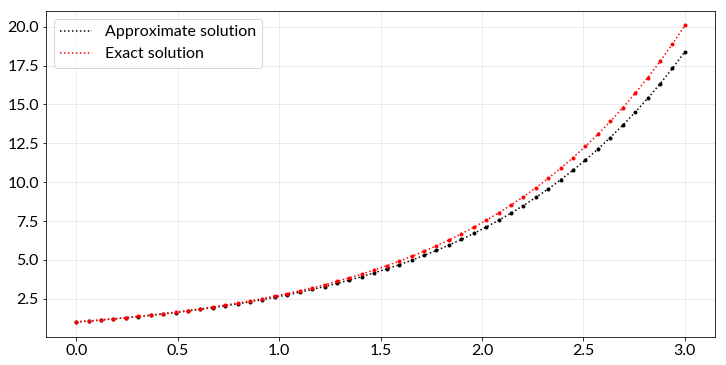

In [114]:
plt.plot(x, solution, linestyle=':', color='k', label="Approximate solution")
plt.plot(x, solution, 'k.')
plt.plot(x, np.exp(x), linestyle=':', color='r', label="Exact solution")
plt.plot(x, np.exp(x), 'r.')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Backward Euler method

Implement backward Euler method. The difference from the forward method is that you have to solve a nonlinear algebraic equation. Do this with a method of your choice, ex. bisection, secant or iteration. It is wise to obtain the zero of the nonlinear equation with accuracy of the same order as in Euler's method.

$$
y_{n+1} = y_n + h f(x_{n+1}, y_{n+1})
$$

In [154]:
import scipy.optimize

In [178]:
def backward_euler(func, domain, y0):
    values = [y0]
    for h, point in zip(np.diff(domain), domain):
        y_n = scipy.optimize.fsolve(lambda z: z - values[-1] - h * func(point, z), 0.5)
        values.append(y_n)
    return values

In [208]:
def func(x, y=None):
    if callable(y):
        return -3 * y(x)
    else:
        return -3 * y

In [209]:
x = np.linspace(0, 3)

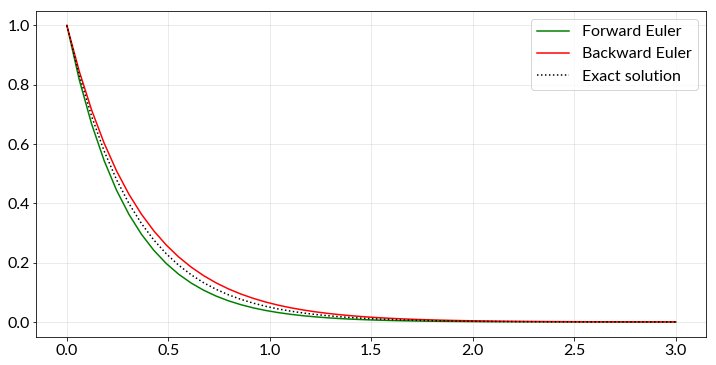

In [210]:
plt.plot(x, forward_euler(func, x, 1), color='g', label='Forward Euler')
plt.plot(x, backward_euler(func, x, 1), color='r', label='Backward Euler')
plt.plot(x, np.exp(-3 * x), color='k', linestyle=':', label='Exact solution')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### Errors

In [213]:
hs = np.logspace(-4, 0)

In [214]:
errors_fe = []
errors_be = []
for h in hs:
    domain = np.arange(0, 3, h)
    errors_fe.append(np.max(np.abs(np.exp(-3 * domain) - forward_euler(func, domain, 1))))
    errors_be.append(np.max(np.abs(np.exp(-3 * domain) - backward_euler(func, domain, 1))))

C:\Users\kboch\Miniconda3\envs\networks\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


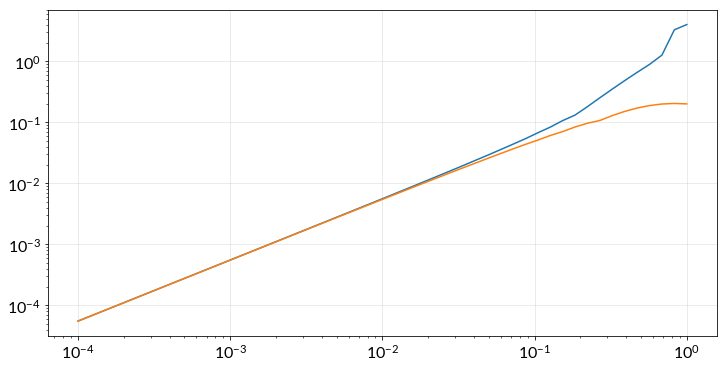

In [215]:
plt.loglog(hs, errors_fe)
plt.loglog(hs, errors_be)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
def local_truncation_error(step_sizes, domain, operator, base_fun,
                           true_derivative, norm=np.max):
    errors = []
    for step in step_sizes:
        errors.append(norm(np.abs(operator(base_fun, h=step)(t) - true_derivative(t))))
    return np.array(errors)

### SymPy 

In [121]:
from sympy import *

In [122]:
x, y, z = symbols('x y z')

In [133]:
solutions = solveset(x ** 2 - 1, x)

In [138]:
dir(solutions)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__or__',
 '__pow__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_accept_eval_derivative',
 '_args',
 '_assumptions',
 '_boundary',
 '_compare_pretty',
 '_complement',
 '_constructor_postprocessor_mapping',
 '_contains',
 '_elements',
 '_eval_Eq',
 '_eval_derivative_n_times',
 '_eval_evalf',
 '_eval_powerset',
 '_eval_rewrite',
 '_eval_subs',
 '_evalf',
 '_exec_constructor_postprocessors',
 '_explicit_class_assumptions',
 '_has',
 '_has_matcher',
 '_hashable_content',
 '_inf',
 '_infimum_key',
 '